#### Code by Henrique Wegner

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Import luas data set and bus data set.

In [2]:
luas_df = pd.read_csv('Data/Luas.csv')

In [3]:
luas_df

,stop_id,stop_name,stop_lat,stop_lon
0,822GA00058,St.Stephen's Green,53.339129,-6.261117
1,822GA00062,Harcourt,53.333651,-6.262692
2,822GA00070,Charlemont,53.330615,-6.258536
3,822GA00071,Charlemont,53.330834,-6.258737
4,822GA00074,Ranelagh,53.326140,-6.256121
...,...,...,...,...
115,gen:57102:3571:1,O'Connell Upper,53.351612,-6.261030
116,gen:57102:3573:1,Parnell,53.353105,-6.260503
117,gen:57102:3577:1,Dominick,53.351345,-6.265547
118,gen:57102:3584:1,Broadstone - DIT,53.354071,-6.273759


In [4]:
bus_df = pd.read_csv('Data/NaPTAN_2019_12_23.csv')

In [5]:
bus_df

,AtcoCode,PlateCode,SCN_English,SCN_Gaeilge,NptgLocalityRef,BusStopType,CompassPoint,Latitude,Longitude,Easting,Northing,ModificationDateTime
0,7000B6310001,631001.0,Belcoo,Béal Cú,NaN,MKD,NE,54.296217,-7.871793,608346.0,838613.0,2016-01-14T18:03:22
1,700000004183,108061.0,Banbridge,Droichead na Banna,NaN,MKD,SW,54.346455,-6.271543,712376.0,845574.0,2019-10-10T15:51:14
2,700000004149,108061.0,Banbridge,Droichead na Banna,NaN,MKD,NE,54.346297,-6.271180,712400.0,845557.0,2018-08-17T16:04:13
3,7000B141561,141561.0,Derrylin,Doire Loinn,NaN,CUS,NaN,54.193380,-7.567849,628202.0,827247.0,2019-10-02T16:05:54
4,7000B140871,140871.0,Derrylin,Doire Loinn,NaN,NaN,NaN,54.193317,-7.567941,628196.0,827240.0,2019-10-02T16:17:50
...,...,...,...,...,...,...,...,...,...,...,...,...
19970,854000001,NaN,NaN,NaN,E0854007,NaN,NaN,54.157089,-7.138513,656269.0,823465.0,2019-06-14T17:07:47
19971,854000002,NaN,NaN,NaN,E0854029,NaN,NaN,54.216834,-7.042790,662431.0,830194.0,2019-06-14T17:08:35
19972,854000011,NaN,NaN,NaN,E0854045,NaN,NaN,54.125713,-6.900559,671865.0,820189.0,2019-06-14T17:09:27
19973,8540LL10198,NaN,Scotshouse,Teach an Scotaigh,E0854040,NaN,NaN,54.122226,-7.248889,649101.0,819503.0,2019-05-13T18:24:36


In [6]:
train_df = pd.read_csv('Data/irish_rail_stops.csv')

In [7]:
train_df

,stop_id,stop_name,stop_lat,stop_lon
0,700G002158,Lisburn Train Station,54.513918,-6.045427
1,700G002159,Lurgan Train Station,54.467303,-6.337867
2,700G002160,Portadown Train Station,54.424267,-6.446564
3,700G002161,Newry Train Station,54.188723,-6.362550
4,821GIR0001,Bagenalstown,52.699135,-6.952594
...,...,...,...,...
144,850GIR0091,Castlerea,53.761530,-8.485715
145,851GIR0092,Sligo,54.272022,-8.481918
146,851GIR0093,Ballymote,54.088191,-8.520779
147,851GIR0094,Collooney,54.186516,-8.494881


# Prepare for adding both datasets together

- Drop irrelevant columns for merge. 




In [8]:
bus_df = bus_df.drop(columns=['PlateCode','SCN_English','SCN_Gaeilge','NptgLocalityRef','BusStopType','CompassPoint','Easting','Northing','ModificationDateTime'])

- Rename the columns so we can add both dataframes together.
- Add a type column with the same value for both dataframes before merge.

In [9]:
bus_df = bus_df.rename({'AtcoCode':'Stop_Id'},axis = 'columns')
bus_df['Type'] = 'Bus Stop'

In [10]:
bus_df

,Stop_Id,Latitude,Longitude,Type
0,7000B6310001,54.296217,-7.871793,Bus Stop
1,700000004183,54.346455,-6.271543,Bus Stop
2,700000004149,54.346297,-6.271180,Bus Stop
3,7000B141561,54.193380,-7.567849,Bus Stop
4,7000B140871,54.193317,-7.567941,Bus Stop
...,...,...,...,...
19970,854000001,54.157089,-7.138513,Bus Stop
19971,854000002,54.216834,-7.042790,Bus Stop
19972,854000011,54.125713,-6.900559,Bus Stop
19973,8540LL10198,54.122226,-7.248889,Bus Stop


- Drop irrelevant columns for merge. 

In [11]:
luas_df = luas_df.rename({'stop_id':'Stop_Id','stop_lat':'Latitude','stop_lon':'Longitude'}, axis = 'columns')

In [12]:
luas_df

,Stop_Id,stop_name,Latitude,Longitude
0,822GA00058,St.Stephen's Green,53.339129,-6.261117
1,822GA00062,Harcourt,53.333651,-6.262692
2,822GA00070,Charlemont,53.330615,-6.258536
3,822GA00071,Charlemont,53.330834,-6.258737
4,822GA00074,Ranelagh,53.326140,-6.256121
...,...,...,...,...
115,gen:57102:3571:1,O'Connell Upper,53.351612,-6.261030
116,gen:57102:3573:1,Parnell,53.353105,-6.260503
117,gen:57102:3577:1,Dominick,53.351345,-6.265547
118,gen:57102:3584:1,Broadstone - DIT,53.354071,-6.273759


- Rename the columns so we can add both dataframes together.
- Add a type column with the same value for both dataframes before merge.

In [13]:
luas_df = luas_df.drop(columns='stop_name')
luas_df['Type'] = "Luas Stop"

In [14]:
luas_df

,Stop_Id,Latitude,Longitude,Type
0,822GA00058,53.339129,-6.261117,Luas Stop
1,822GA00062,53.333651,-6.262692,Luas Stop
2,822GA00070,53.330615,-6.258536,Luas Stop
3,822GA00071,53.330834,-6.258737,Luas Stop
4,822GA00074,53.326140,-6.256121,Luas Stop
...,...,...,...,...
115,gen:57102:3571:1,53.351612,-6.261030,Luas Stop
116,gen:57102:3573:1,53.353105,-6.260503,Luas Stop
117,gen:57102:3577:1,53.351345,-6.265547,Luas Stop
118,gen:57102:3584:1,53.354071,-6.273759,Luas Stop


In [15]:
train_df = train_df.rename({'stop_id':'Stop_Id','stop_lat':'Latitude','stop_lon':'Longitude'}, axis = 'columns')

In [16]:
train_df = train_df.drop(columns='stop_name')
train_df['Type'] = "Train Stop"

In [17]:
train_df

,Stop_Id,Latitude,Longitude,Type
0,700G002158,54.513918,-6.045427,Train Stop
1,700G002159,54.467303,-6.337867,Train Stop
2,700G002160,54.424267,-6.446564,Train Stop
3,700G002161,54.188723,-6.362550,Train Stop
4,821GIR0001,52.699135,-6.952594,Train Stop
...,...,...,...,...
144,850GIR0091,53.761530,-8.485715,Train Stop
145,851GIR0092,54.272022,-8.481918,Train Stop
146,851GIR0093,54.088191,-8.520779,Train Stop
147,851GIR0094,54.186516,-8.494881,Train Stop


- Add both dataframes together.


In [18]:
blt_df = bus_df.append(luas_df)

In [19]:
blt_df = blt_df.append(train_df)

- Reset index.

In [20]:
blt_df = blt_df.reset_index()

- Drop old indexes.

In [21]:
blt_df = blt_df.drop(columns='index')

In [22]:
blt_df

,Stop_Id,Latitude,Longitude,Type
0,7000B6310001,54.296217,-7.871793,Bus Stop
1,700000004183,54.346455,-6.271543,Bus Stop
2,700000004149,54.346297,-6.271180,Bus Stop
3,7000B141561,54.193380,-7.567849,Bus Stop
4,7000B140871,54.193317,-7.567941,Bus Stop
...,...,...,...,...
20239,850GIR0091,53.761530,-8.485715,Train Stop
20240,851GIR0092,54.272022,-8.481918,Train Stop
20241,851GIR0093,54.088191,-8.520779,Train Stop
20242,851GIR0094,54.186516,-8.494881,Train Stop


- Check null values.

In [23]:
blt_df.isnull().sum()

Stop_Id      0
Latitude     2
Longitude    2
Type         0
dtype: int64

- Drop NA values (as we only have 2).

In [24]:
blt_df = blt_df.dropna()

- Save as csv

In [25]:
blt_df.to_csv ('Data\BLT_stops.csv', index = False, header=True)

# Post Merge

- Name scatterplot for test

In [31]:
scatter_test = blt_df

- Creates a Scatteplor just to see the distribution of the points. (We can see the outliers).

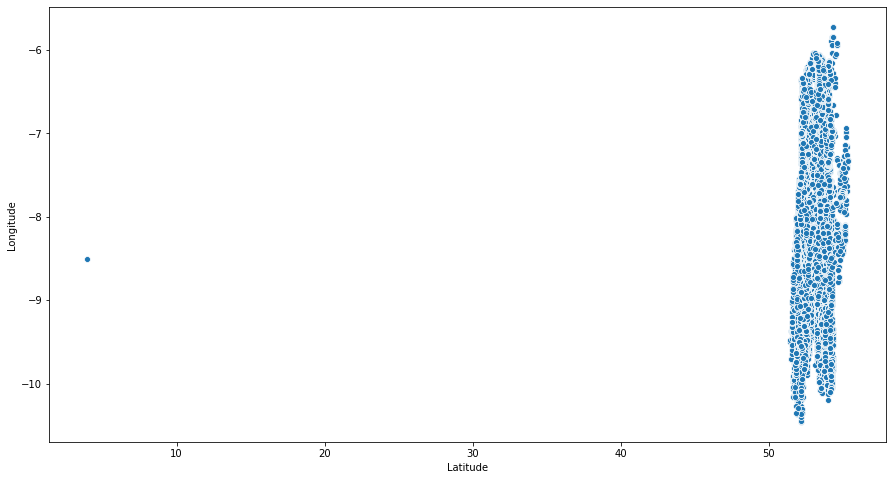

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
sns.scatterplot(scatter_test["Latitude"], scatter_test["Longitude"])

- Separating 1000 coordinates to show on the map.

In [34]:
test_df = blt_df.tail(100)

- This script creates a map that will add points according to the latitude and longitude of each row. Saves to a html page in the end.
- You can check the map inside the folder that this file is in.

In [35]:
import folium

map_pickup = folium.Map( location=[53.347409, -6.272184])

test_df.apply(lambda row:folium.Marker(location=[row["Latitude"], row["Longitude"]] ).add_to(map_pickup), axis=1)

map_pickup

map_pickup.save('map_pickup.html')